## Wrangling and analysis of data obtained from WeRateDogs' twitter page.

A little bit of a background, the dataset from which the following insights were obtained is from the twitter account "WeRateDogs". This data consisted of three separate datasets which were eventually merged into one. 

The first dataset was made available for download, and contained some information which were previously obtained from the twitter API. Information such as the ID of the tweets made, the time they were made etc, were present in this dataset.

The second dataset which was downloaded programmatically using the python requests library is a .tsv file, containing the url to images of dogs which were posted on the WeRateDogs' twitter page, along with the corresponding tweet ID. These images were ran through an AI which tried to identify what dog breeds were present in the picture.

The third dataset was scrapped from the twitter APi, and contains complementary information for the first dataset such as favorite count and retweet count.

These datasets were assessed, cleaned, trimmed, and then analyzed for insights and visualizations.

The first question raised was what dog names were most common. <br>
Upon analyzing the available data, they were discovered to be Charlie, Cooper, Lucy Oliver and Tucker. 

The second question raised was what dog breeds are most common. <br>
These were discovered to be the Golden retriever at number one, followed by the Labrador retriever, Pembroke, chihuahua and the pug.

The dogs were divided into different growth stages; doggo, puppo, floofer and pupper. The dog stage with the highest retweet count was the doggo and the dog stage with lowest retweet count was the pupper.

The dog breed which seems to get the most likes is the golden retriever, which also happens to be the most common dog breed. This is closely followed by the labrador retriever, then the pembroke, chihuahua and the samoyed. This may be observed in the visualization below

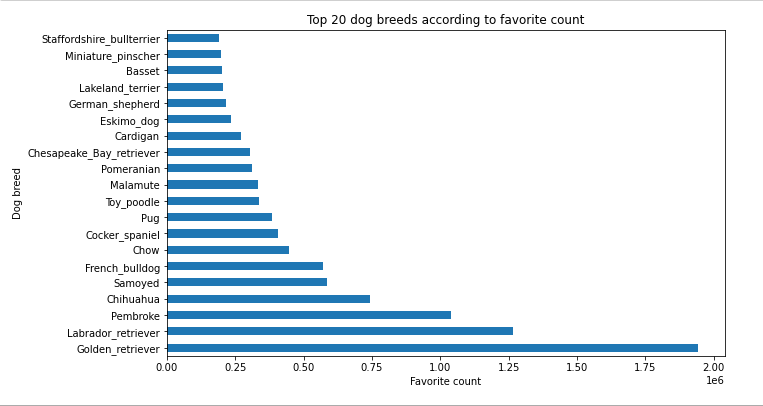

The correlation between the favorite count and the retweet count was also explored in the visualization below with the use of a scatterplot.

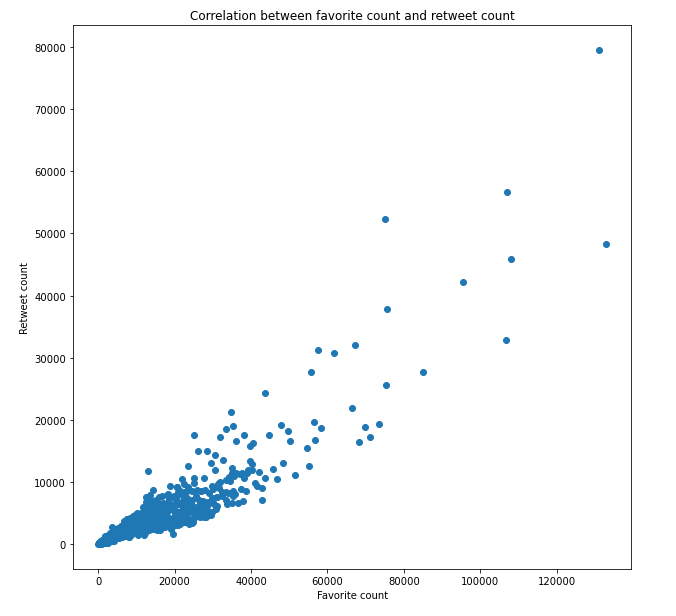

Finally the dog with the highest favorite count of all was discovered to be a puppo lakeland terrier whose names was sadly not available in the dataset. The image of this puppo may be viewed below.

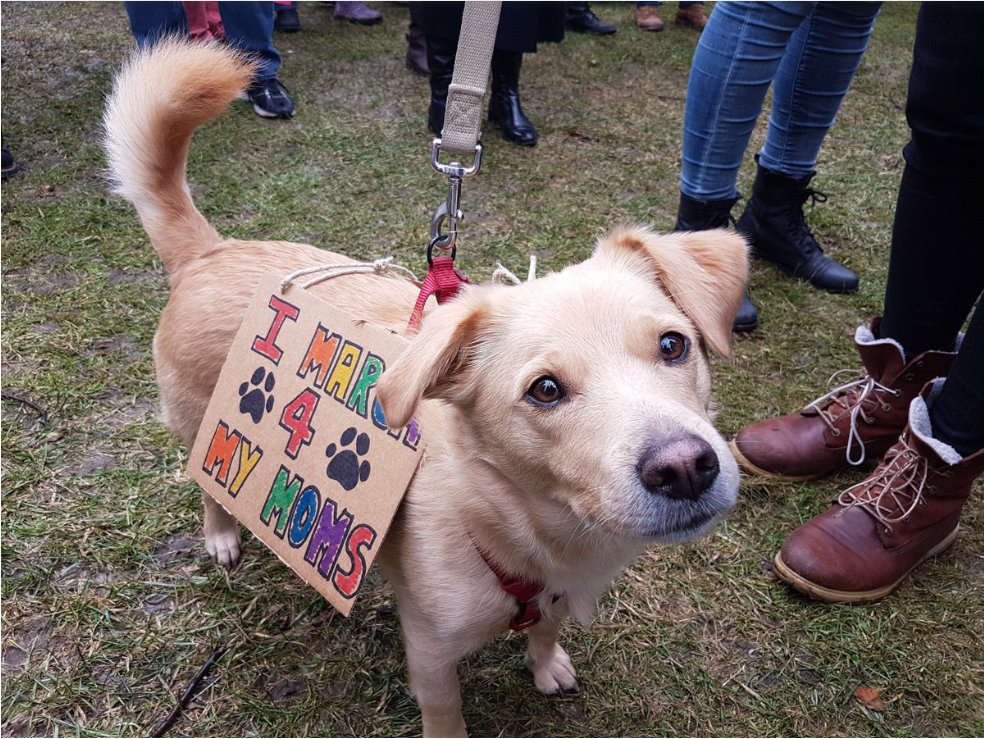

This concludes my report on the dataset.